# Exploring the driving under the influence of alcohol dataset

The data used for this notebook represents the percentage of drivers under the influence of alcohol in Serbia, for the years 2013, 2015, 2016 and 2017. This data was taken from the [open data](https://data.gov.rs/sr/datasets/) provided by Republic of Serbia. The vehicle category is not specified anywhere because all the data refer to drivers of passenger vehicles.

## The aim

Some key insights to gather during the analysis:
- In which police departments is the highest percentage of drivers under the influence of alcohol?
- Is the percentage increasing or decreasing as the time goes?
- Are there some big differences in percentage for different days, different time and different areas?
- Are there any patterns that we can spot?

## Importing dataset

In [1]:
import pandas as pd

df = pd.read_csv('./dutioa.csv', header=None)
df.head()

,0
0,ID Policijska uprava;Policijska uprava;Godina;...
1,100;Srbija;2013;36876;0.88;1.08;;;1.08;0.84;0....
2,1;Beograd;2013;2521;1.29;0.31;0.31;1.29;0.58;0...
3,2;Kragujevac;2013;2798;1.20;1.41;0.97;1.68;1.2...
4,3;Jagodina;2013;1093;0.61;2.29;0.49;2.28;1.97;...


## Making changes to DataFrame

In [2]:
# Creating columns
df = (df[0].str.split(';', expand=True))[1:]
df = df.drop(columns=[0, 10, 11, 12, 13])
df.columns = [
    'Police department', 
    'Year', 
    'Number of tested drivers', 
    '% Of drivers under the influence of alcohol - work days', 
    '% Of drivers under the influence of alcohol - weekend', 
    '% Of drivers under the influence of alcohol - day', 
    '% Of drivers under the influence of alcohol - night', 
    '% Of drivers under the influence of alcohol - populated area', 
    '% Of drivers under the influence of alcohol - nonpopulated area'
]

# For every year, there is a row representing the whole country,
# we want to remove those rows and leave only police departments
df = df[df['Police department'] != 'Srbija']

# Changing data types
df = df.astype({
    'Year': 'int', 
    'Number of tested drivers': 'int', 
    '% Of drivers under the influence of alcohol - work days': 'float', 
    '% Of drivers under the influence of alcohol - weekend': 'float', 
    '% Of drivers under the influence of alcohol - day': 'float', 
    '% Of drivers under the influence of alcohol - night': 'float', 
    '% Of drivers under the influence of alcohol - populated area': 'float', 
    '% Of drivers under the influence of alcohol - nonpopulated area': 'float'
})
df.head()

,Police department,Year,Number of tested drivers,% Of drivers under the influence of alcohol - work days,% Of drivers under the influence of alcohol - weekend,% Of drivers under the influence of alcohol - day,% Of drivers under the influence of alcohol - night,% Of drivers under the influence of alcohol - populated area,% Of drivers under the influence of alcohol - nonpopulated area
2,Beograd,2013,2521,1.29,0.31,0.31,1.29,0.58,0.87
3,Kragujevac,2013,2798,1.20,1.41,0.97,1.68,1.20,1.23
4,Jagodina,2013,1093,0.61,2.29,0.49,2.28,1.97,0.68
5,Niš,2013,1284,1.40,2.94,0.79,3.82,2.41,1.62
6,Pirot,2013,951,0.35,1.04,0.67,0.57,0.39,0.92


Let's take a look at all the police departments

In [3]:
police_dep = df['Police department'].unique()
print(police_dep)
print(f'\nNumber of police departments: {len(police_dep)}')

['Beograd' 'Kragujevac' 'Jagodina' 'Niš' 'Pirot' 'Leskovac' 'Vranje'
 'Zaječar' 'Bor' 'Smederevo' 'Požarevac' 'Valjevo' 'Šabac' 'Kraljevo'
 'Kruševac' 'Čačak' 'Novi Pazar' 'Užice' 'Prijepolje' 'Novi Sad'
 'Zrenjanin' 'Kikinda' 'Pančevo' 'Sombor' 'Subotica' 'Sremska Mitrovica']

Number of police departments: 26


We can make separate DataFrame for each year

In [4]:
df_2013 = df[df['Year'] == 2013]
df_2015 = df[df['Year'] == 2015]
df_2016 = df[df['Year'] == 2016]
df_2017 = df[df['Year'] == 2017]

## Let's analyze and visualize

First, let's compare percentage of alcohol influenced drivers on the work days and on the weekend, and see if there is any significant difference between them. For this, we will use dataset for year 2013.

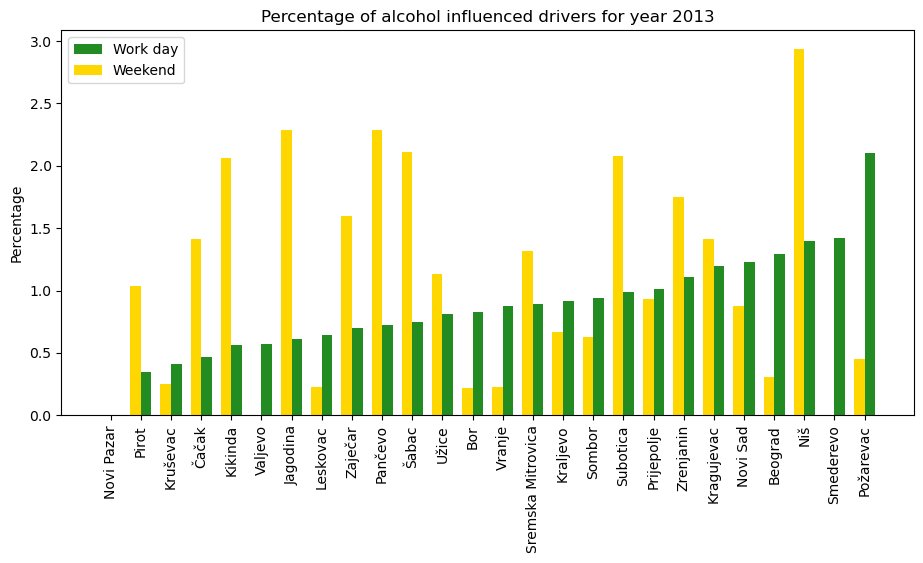

In [5]:
import matplotlib.pyplot as plt

df_2013_sorted = df_2013.sort_values(by=['% Of drivers under the influence of alcohol - work days'])
alc_influence_wd = df_2013_sorted['% Of drivers under the influence of alcohol - work days']
alc_influence_we = df_2013_sorted['% Of drivers under the influence of alcohol - weekend']
police_dep = df_2013_sorted['Police department']

fig = plt.figure(figsize = (11, 5))
plt.bar(police_dep, alc_influence_wd.values, color = 'forestgreen', width=0.35, align='edge')
plt.bar(police_dep, alc_influence_we.values, color = 'gold', width=-0.35, align='edge')
plt.xticks(rotation = 90)
plt.ylabel("Percentage")
plt.title("Percentage of alcohol influenced drivers for year 2013")
plt.legend(labels=['Work day', 'Weekend'])
plt.show()

The results are very interesting. In most cases there is noticeable difference between the percenteges of alcohol influenced drivers, but the most interesting part is that the difference is not consistent between different police departments, in sense that there are police departments where percentage is higher on the work days, and police departments where the percentage is higher on the weekend. For example, if we look at "Požarevac", which is the P.D. with highest percentage of alcohol influenced drivers on work days, percentage is much lower on the weekend. Meanwhile, if we look at "Jagodina", percentage is more than 3 times higher on the weekend.

One more thing we can see is that there is much more "bounces" between the different P.D's when we look at weekend percentage.

Next, let's compare the percentage with the year 2015. And this time, for simplicity, let's just focus on the work days.

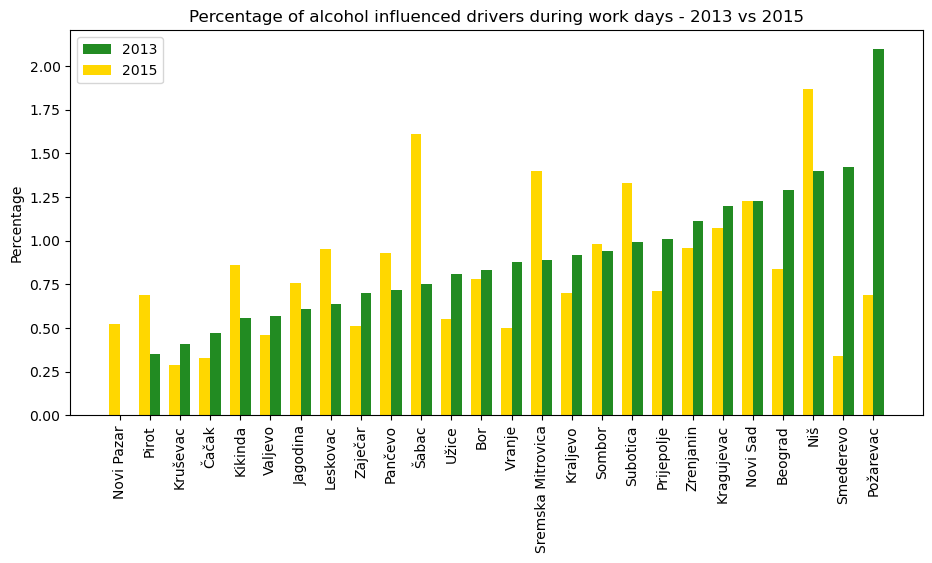

In [6]:
df_2013_sorted = df_2013.sort_values(by=['% Of drivers under the influence of alcohol - work days'])
df_2015_sorted = df_2015.set_index('Police department')
df_2015_sorted = df_2015_sorted.reindex(index=df_2013_sorted['Police department'])
df_2015_sorted = df_2015_sorted.reset_index()
alc_influence_wd_2013 = df_2013_sorted['% Of drivers under the influence of alcohol - work days']
alc_influence_wd_2015 = df_2015_sorted['% Of drivers under the influence of alcohol - work days']
police_dep = df_2013_sorted['Police department']

fig = plt.figure(figsize = (11, 5))
plt.bar(police_dep, alc_influence_wd_2013.values, color = 'forestgreen', width=0.35, align='edge')
plt.bar(police_dep, alc_influence_wd_2015.values, color = 'gold', width=-0.35, align='edge')
plt.xticks(rotation = 90)
plt.ylabel("Percentage")
plt.title("Percentage of alcohol influenced drivers during work days - 2013 vs 2015")
plt.legend(labels=['2013', '2015'])
plt.show()

In [16]:
import numpy as np

mean_2013 = np.around(alc_influence_wd_2013.mean(), decimals=2)
mean_2015 = np.around(alc_influence_wd_2015.mean(), decimals=2)

print(f'Mean percentage of drivers under the influence of alcohol during work days for 2013: {mean_2013}')
print(f'Mean percentage of drivers under the influence of alcohol during work days for 2015: {mean_2015}')

Mean percentage of drivers under the influence of alcohol during work days for 2013: 0.88
Mean percentage of drivers under the influence of alcohol during work days for 2015: 0.84


As we can see, the difference between year 2013 and year 2015 is pretty small. But still, there is some improvement, in the majority of P.D's there is a small percentage reduction.

Now, let's compare years 2015, 2016 and 2017.

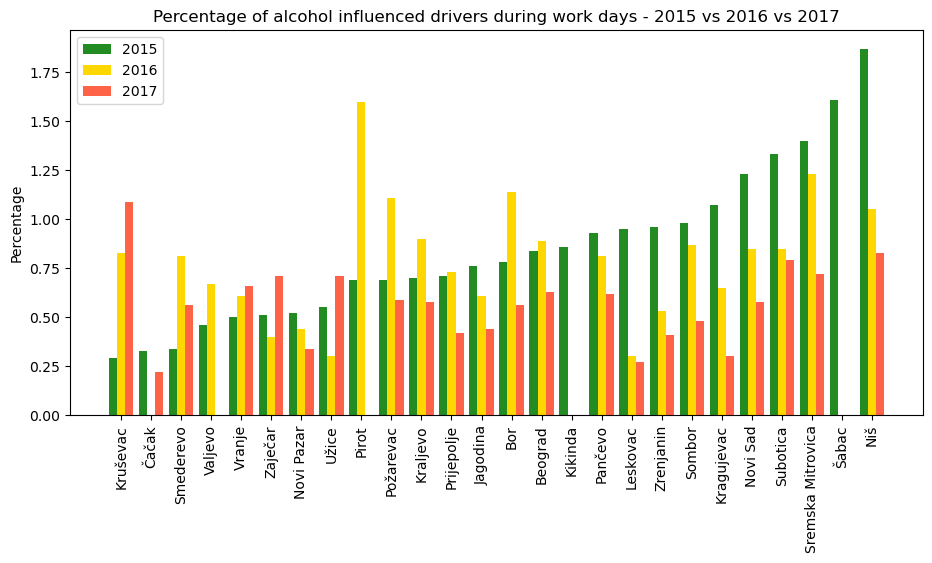

In [8]:
df_2015_sorted = df_2015.sort_values(by=['% Of drivers under the influence of alcohol - work days'])
df_2016_sorted = df_2016.set_index('Police department')
df_2016_sorted = df_2016_sorted.reindex(index=df_2015_sorted['Police department'])
df_2016_sorted = df_2016_sorted.reset_index()
df_2017_sorted = df_2017.set_index('Police department')
df_2017_sorted = df_2017_sorted.reindex(index=df_2015_sorted['Police department'])
df_2017_sorted = df_2017_sorted.reset_index()
alc_influence_wd_2015 = df_2015_sorted['% Of drivers under the influence of alcohol - work days']
alc_influence_wd_2016 = df_2016_sorted['% Of drivers under the influence of alcohol - work days']
alc_influence_wd_2017 = df_2017_sorted['% Of drivers under the influence of alcohol - work days']
police_dep = df_2015_sorted['Police department']

fig = plt.figure(figsize = (11, 5))
X_axis = np.arange(len(police_dep))
plt.bar(X_axis - 0.27, alc_influence_wd_2015.values, 0.27, color = 'forestgreen')
plt.bar(X_axis - 0, alc_influence_wd_2016.values, 0.27, color = 'gold')
plt.bar(X_axis + 0.27, alc_influence_wd_2017.values, 0.27, color = 'tomato')
plt.xticks(X_axis, police_dep, rotation = 90)
plt.ylabel("Percentage")
plt.title("Percentage of alcohol influenced drivers during work days - 2015 vs 2016 vs 2017")
plt.legend(labels=['2015', '2016', '2017'])
plt.show()

In [15]:
mean_2015 = np.around(alc_influence_wd_2015.mean(), decimals=2)
mean_2016 = np.around(alc_influence_wd_2016.mean(), decimals=2)
mean_2017 = np.around(alc_influence_wd_2017.mean(), decimals=2)

print(f'Mean percentage of drivers under the influence of alcohol during work days for 2015: {mean_2015}')
print(f'Mean percentage of drivers under the influence of alcohol during work days for 2016: {mean_2016}')
print(f'Mean percentage of drivers under the influence of alcohol during work days for 2017: {mean_2017}')

Mean percentage of drivers under the influence of alcohol during work days for 2015: 0.84
Mean percentage of drivers under the influence of alcohol during work days for 2016: 0.7
Mean percentage of drivers under the influence of alcohol during work days for 2017: 0.48


Now we are starting to see some bigger differences. Difference between 2015 and 2016 is definitely more noticeable than between 2013 and 2015. Then, when we come 2017, the difference is even bigger, although we can see that in P.D's where percentage was initially low, now it is increasing. That being said, it is really nice to see that the overall percentage of drivers under the influence of alcohol is decreasing every year.

We've looked at the statistics of drivers under the influence of alcohol during the work days and weekends, but what about the daytime and nighttime percenteges of drivers under the influence of alcohol, is there something interesting to see? Let's find out.

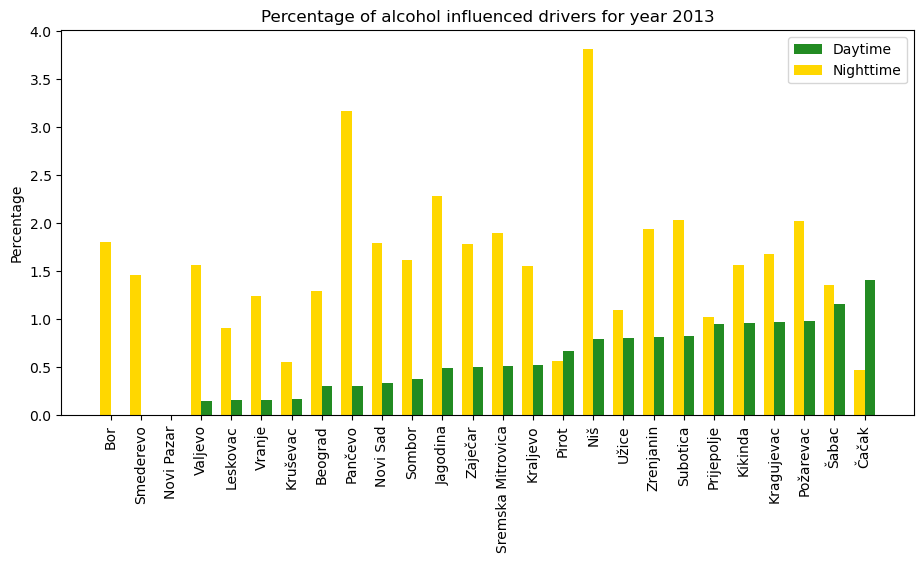

In [12]:
df_2013_sorted = df_2013.sort_values(by=['% Of drivers under the influence of alcohol - day'])
alc_influence_d = df_2013_sorted['% Of drivers under the influence of alcohol - day']
alc_influence_n = df_2013_sorted['% Of drivers under the influence of alcohol - night']
police_dep = df_2013_sorted['Police department']

fig = plt.figure(figsize = (11, 5))
plt.bar(police_dep, alc_influence_d.values, color = 'forestgreen', width=0.35, align='edge')
plt.bar(police_dep, alc_influence_n.values, color = 'gold', width=-0.35, align='edge')
plt.xticks(rotation = 90)
plt.ylabel("Percentage")
plt.title("Percentage of alcohol influenced drivers for year 2013")
plt.legend(labels=['Daytime', 'Nighttime'])
plt.show()

We started again with 2013. The results are not surprising, the later hours are usually the time when people try to relax and have a drink or two, although it's not the best choice to drive afterwards. We didn't see much of a difference between 2013 and 2015 when it came to percentage of drivers under the influence of alcohol during work days, so let's just move on to the 2015, 2016 and 2017 daytime and nighttime comparison instead of comparing 2013 and 2015.

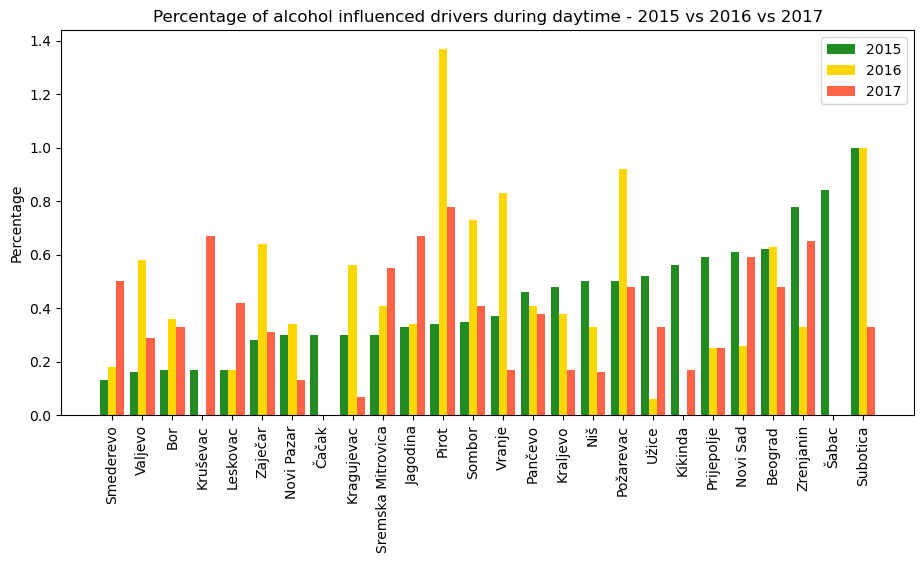

In [19]:
df_2015_sorted = df_2015.sort_values(by=['% Of drivers under the influence of alcohol - day'])
df_2016_sorted = df_2016.set_index('Police department')
df_2016_sorted = df_2016_sorted.reindex(index=df_2015_sorted['Police department'])
df_2016_sorted = df_2016_sorted.reset_index()
df_2017_sorted = df_2017.set_index('Police department')
df_2017_sorted = df_2017_sorted.reindex(index=df_2015_sorted['Police department'])
df_2017_sorted = df_2017_sorted.reset_index()
alc_influence_d_2015 = df_2015_sorted['% Of drivers under the influence of alcohol - day']
alc_influence_d_2016 = df_2016_sorted['% Of drivers under the influence of alcohol - day']
alc_influence_d_2017 = df_2017_sorted['% Of drivers under the influence of alcohol - day']
police_dep = df_2015_sorted['Police department']

fig = plt.figure(figsize = (11, 5))
X_axis = np.arange(len(police_dep))
plt.bar(X_axis - 0.27, alc_influence_d_2015.values, 0.27, color = 'forestgreen')
plt.bar(X_axis - 0, alc_influence_d_2016.values, 0.27, color = 'gold')
plt.bar(X_axis + 0.27, alc_influence_d_2017.values, 0.27, color = 'tomato')
plt.xticks(X_axis, police_dep, rotation = 90)
plt.ylabel("Percentage")
plt.title("Percentage of alcohol influenced drivers during daytime - 2015 vs 2016 vs 2017")
plt.legend(labels=['2015', '2016', '2017'])
plt.show()

In [20]:
mean_2015 = np.around(alc_influence_d_2015.mean(), decimals=2)
mean_2016 = np.around(alc_influence_d_2016.mean(), decimals=2)
mean_2017 = np.around(alc_influence_d_2017.mean(), decimals=2)

print(f'Mean percentage of drivers under the influence of alcohol during daytime for 2015: {mean_2015}')
print(f'Mean percentage of drivers under the influence of alcohol during daytime for 2016: {mean_2016}')
print(f'Mean percentage of drivers under the influence of alcohol during daytime for 2017: {mean_2017}')

Mean percentage of drivers under the influence of alcohol during daytime for 2015: 0.43
Mean percentage of drivers under the influence of alcohol during daytime for 2016: 0.43
Mean percentage of drivers under the influence of alcohol during daytime for 2017: 0.36


As we can see, there is practically no difference between 2015 and 2016 in terms of mean value of percentage of drivers under the influence of alcohol during daytime. Luckily, in 2017 we see some decrease in percentage, but on the other hand we see the same pattern that we've seen with percentage related to work days - percentage in P.D's that was initially low is increasing. Now let's check if the percentage is more optimistic at night.

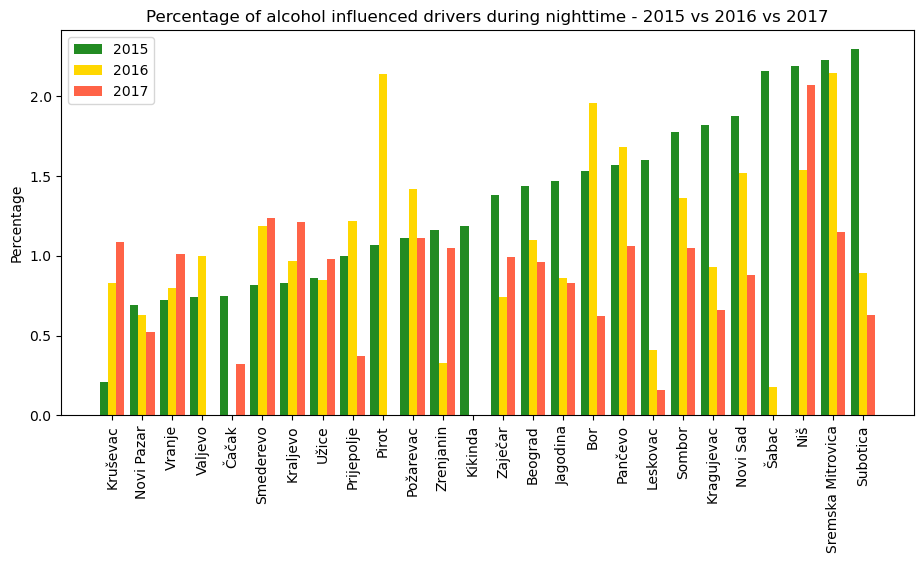

In [18]:
df_2015_sorted = df_2015.sort_values(by=['% Of drivers under the influence of alcohol - night'])
df_2016_sorted = df_2016.set_index('Police department')
df_2016_sorted = df_2016_sorted.reindex(index=df_2015_sorted['Police department'])
df_2016_sorted = df_2016_sorted.reset_index()
df_2017_sorted = df_2017.set_index('Police department')
df_2017_sorted = df_2017_sorted.reindex(index=df_2015_sorted['Police department'])
df_2017_sorted = df_2017_sorted.reset_index()
alc_influence_n_2015 = df_2015_sorted['% Of drivers under the influence of alcohol - night']
alc_influence_n_2016 = df_2016_sorted['% Of drivers under the influence of alcohol - night']
alc_influence_n_2017 = df_2017_sorted['% Of drivers under the influence of alcohol - night']
police_dep = df_2015_sorted['Police department']

fig = plt.figure(figsize = (11, 5))
X_axis = np.arange(len(police_dep))
plt.bar(X_axis - 0.27, alc_influence_n_2015.values, 0.27, color = 'forestgreen')
plt.bar(X_axis - 0, alc_influence_n_2016.values, 0.27, color = 'gold')
plt.bar(X_axis + 0.27, alc_influence_n_2017.values, 0.27, color = 'tomato')
plt.xticks(X_axis, police_dep, rotation = 90)
plt.ylabel("Percentage")
plt.title("Percentage of alcohol influenced drivers during nighttime - 2015 vs 2016 vs 2017")
plt.legend(labels=['2015', '2016', '2017'])
plt.show()

In [22]:
mean_2015 = np.around(alc_influence_n_2015.mean(), decimals=2)
mean_2016 = np.around(alc_influence_n_2016.mean(), decimals=2)
mean_2017 = np.around(alc_influence_n_2017.mean(), decimals=2)

print(f'Mean percentage of drivers under the influence of alcohol during nighttime for 2015: {mean_2015}')
print(f'Mean percentage of drivers under the influence of alcohol during nighttime for 2016: {mean_2016}')
print(f'Mean percentage of drivers under the influence of alcohol during nighttime for 2017: {mean_2017}')

Mean percentage of drivers under the influence of alcohol during nighttime for 2015: 1.33
Mean percentage of drivers under the influence of alcohol during nighttime for 2016: 1.03
Mean percentage of drivers under the influence of alcohol during nighttime for 2017: 0.77


As expected, nighttime percentage is higher than the daytime percentage, but percentage decrease is more noticeable during the nighttime. We can definitely see progress.

Lastly, let's compare percentage of drivers under the influence of alcohol in populated and non-populated areas for 2015, 2016 and 2017.

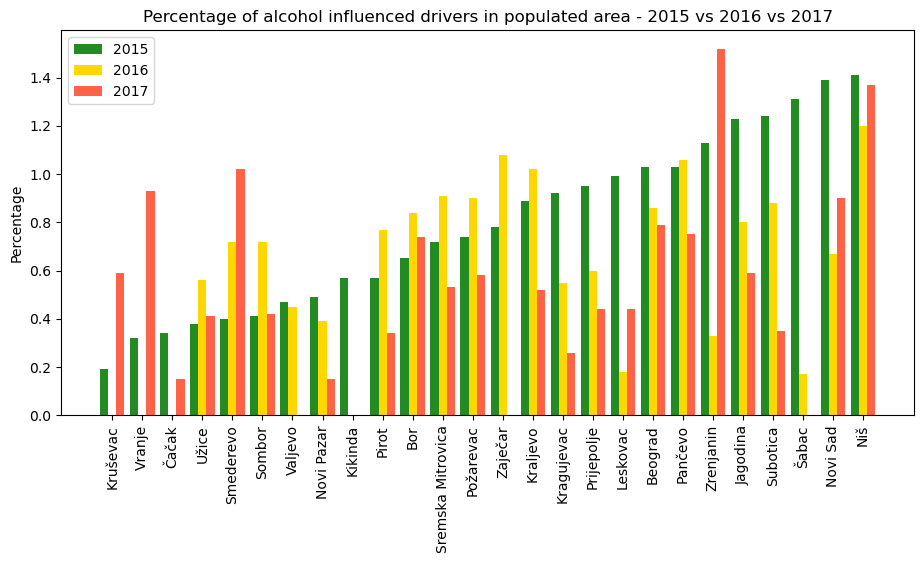

In [23]:
df_2015_sorted = df_2015.sort_values(by=['% Of drivers under the influence of alcohol - populated area'])
df_2016_sorted = df_2016.set_index('Police department')
df_2016_sorted = df_2016_sorted.reindex(index=df_2015_sorted['Police department'])
df_2016_sorted = df_2016_sorted.reset_index()
df_2017_sorted = df_2017.set_index('Police department')
df_2017_sorted = df_2017_sorted.reindex(index=df_2015_sorted['Police department'])
df_2017_sorted = df_2017_sorted.reset_index()
alc_influence_p_2015 = df_2015_sorted['% Of drivers under the influence of alcohol - populated area']
alc_influence_p_2016 = df_2016_sorted['% Of drivers under the influence of alcohol - populated area']
alc_influence_p_2017 = df_2017_sorted['% Of drivers under the influence of alcohol - populated area']
police_dep = df_2015_sorted['Police department']

fig = plt.figure(figsize = (11, 5))
X_axis = np.arange(len(police_dep))
plt.bar(X_axis - 0.27, alc_influence_p_2015.values, 0.27, color = 'forestgreen')
plt.bar(X_axis - 0, alc_influence_p_2016.values, 0.27, color = 'gold')
plt.bar(X_axis + 0.27, alc_influence_p_2017.values, 0.27, color = 'tomato')
plt.xticks(X_axis, police_dep, rotation = 90)
plt.ylabel("Percentage")
plt.title("Percentage of alcohol influenced drivers in populated area - 2015 vs 2016 vs 2017")
plt.legend(labels=['2015', '2016', '2017'])
plt.show()

In [24]:
mean_2015 = np.around(alc_influence_p_2015.mean(), decimals=2)
mean_2016 = np.around(alc_influence_p_2016.mean(), decimals=2)
mean_2017 = np.around(alc_influence_p_2017.mean(), decimals=2)

print(f'Mean percentage of drivers under the influence of alcohol during nighttime for 2015: {mean_2015}')
print(f'Mean percentage of drivers under the influence of alcohol during nighttime for 2016: {mean_2016}')
print(f'Mean percentage of drivers under the influence of alcohol during nighttime for 2017: {mean_2017}')

Mean percentage of drivers under the influence of alcohol during nighttime for 2015: 0.79
Mean percentage of drivers under the influence of alcohol during nighttime for 2016: 0.6
Mean percentage of drivers under the influence of alcohol during nighttime for 2017: 0.53


Overall we can see that the mean value is decreasing overtime, but we can also see a few spikes in 2017, for example in 'Kruševac', 'Vranje' and 'Smederevo'. Let's hope for better results in non-populated areas.

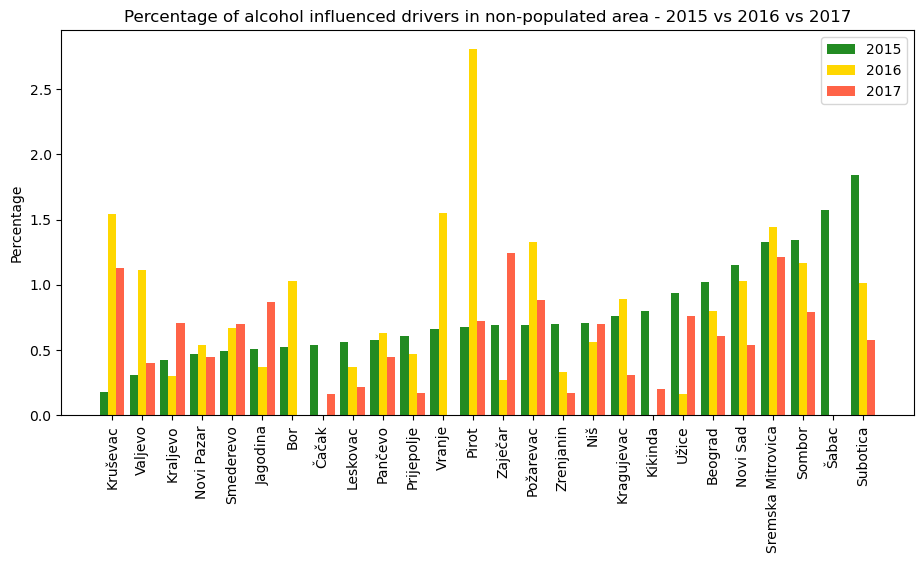

In [25]:
df_2015_sorted = df_2015.sort_values(by=['% Of drivers under the influence of alcohol - nonpopulated area'])
df_2016_sorted = df_2016.set_index('Police department')
df_2016_sorted = df_2016_sorted.reindex(index=df_2015_sorted['Police department'])
df_2016_sorted = df_2016_sorted.reset_index()
df_2017_sorted = df_2017.set_index('Police department')
df_2017_sorted = df_2017_sorted.reindex(index=df_2015_sorted['Police department'])
df_2017_sorted = df_2017_sorted.reset_index()
alc_influence_np_2015 = df_2015_sorted['% Of drivers under the influence of alcohol - nonpopulated area']
alc_influence_np_2016 = df_2016_sorted['% Of drivers under the influence of alcohol - nonpopulated area']
alc_influence_np_2017 = df_2017_sorted['% Of drivers under the influence of alcohol - nonpopulated area']
police_dep = df_2015_sorted['Police department']

fig = plt.figure(figsize = (11, 5))
X_axis = np.arange(len(police_dep))
plt.bar(X_axis - 0.27, alc_influence_np_2015.values, 0.27, color = 'forestgreen')
plt.bar(X_axis - 0, alc_influence_np_2016.values, 0.27, color = 'gold')
plt.bar(X_axis + 0.27, alc_influence_np_2017.values, 0.27, color = 'tomato')
plt.xticks(X_axis, police_dep, rotation = 90)
plt.ylabel("Percentage")
plt.title("Percentage of alcohol influenced drivers in non-populated area - 2015 vs 2016 vs 2017")
plt.legend(labels=['2015', '2016', '2017'])
plt.show()

In [26]:
mean_2015 = np.around(alc_influence_np_2015.mean(), decimals=2)
mean_2016 = np.around(alc_influence_np_2016.mean(), decimals=2)
mean_2017 = np.around(alc_influence_np_2017.mean(), decimals=2)

print(f'Mean percentage of drivers under the influence of alcohol during nighttime for 2015: {mean_2015}')
print(f'Mean percentage of drivers under the influence of alcohol during nighttime for 2016: {mean_2016}')
print(f'Mean percentage of drivers under the influence of alcohol during nighttime for 2017: {mean_2017}')

Mean percentage of drivers under the influence of alcohol during nighttime for 2015: 0.77
Mean percentage of drivers under the influence of alcohol during nighttime for 2016: 0.78
Mean percentage of drivers under the influence of alcohol during nighttime for 2017: 0.54


We can see that percentage for 2016 is overall a bit worse than for 2015, but that is mostly because of crazy spike in 'Pirot'. That being said, I think we can agree that there is some improvement.

## Conclusion
Overall we saw that the percentage of drivers under the influence of alcohol is decreasing over time in all cases (during work days, weekends, daytime, nighttime and in populated and non-populated areas). But there is one strange pattern, while the percentage for some police departments that was initialy high (for example 'Šabac', 'Subotica', 'Kragujevac' and 'Novi Sad') is mostly decreasing over time, there are some police departments which had low percentage initialy and it is increasing over time (for example 'Kruševac', 'Vranje' and 'Smederevo'). It is not completely clear why is that happening, but we can see that the percentage in bigger areas is usually decreasing, while it is increasing in smaller areas, although this is not true in all cases. As expected, there is higher percentage of drivers under the influence of alcohol during weekends, especially during nighttime. As for populated and non-populated areas, there are some higher percentages in non-populated area, that is maybe because drivers in non-populated areas think they are less likely to be stopped by the police.